In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import pandas as pd
%matplotlib inline
import sys
import easygui

import json

from nptdms import TdmsFile as TF

import importlib

import mhdpy.load as load
import mhdpy.analysis as analysis

mpl.rcParams.update({'font.size': 18})

datafolder = "C:\\Users\\aspit\\OneDrive\\Data\\"

In [3]:
#filepaths_PL = easygui.fileopenbox(multiple=True,default = datafolder)
#filepaths_PL
filepaths_PL = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_10Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_20Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_50Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_100Hz.spe', 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\PIMAX_1_60C_200Hz.spe']

#filepaths_pow = easygui.fileopenbox(multiple=True,default = datafolder)
filepaths_pow = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_10Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_20Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_50Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_100Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_Powermeter_0_60C_200Hz_0.tdms']

#filepaths_T = easygui.fileopenbox(multiple=True,default = datafolder)
filepaths_T = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_10Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_20Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_50Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_100Hz_0.tdms',
 'C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Proj_VaporTubes\\RepRate2\\Log_TC1_0_cut_60C_200Hz_0.tdms']

dfs_PL = load.common.create_tcdict(filepaths_PL,load.spe.spe2df_spect,prefix = 'PIMAX_1_')
dfs_pow = load.common.create_tcdict(filepaths_pow,load.common.tdms2df,prefix = 'Log_Powermeter_0')
dfs_T = load.common.create_tcdict(filepaths_T,load.common.tdms2df,prefix = 'Log_TC1_0_cut_')

#filepath_lastime = easygui.fileopenbox(multiple=True,default = datafolder)
filepath_lasertime = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Logfiles\\PIMAX_2\\PIMax_Timing_Parsed.tdms']

df_lt = TF(filepath_lasertime[0]).as_dataframe()

#filepath_EL = easygui.fileopenbox(multiple=True,default = datafolder)
filepath_EL = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-10\\Eventlog.json']
with open(filepath_EL[0]) as read_file:
    eventlog = json.load(read_file)

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\nptdms\tdms.py:226: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  return pd.DataFrame.from_items(temp)


In [4]:
dfs_PL_cut = {}
for testcase in dfs_PL:
    dfs_PL_cut[testcase] = analysis.trpl.cutspectraldf(dfs_PL[testcase], 778,798)

reprates = [10,20,50,100,200]

# maximums = []
# for filename in dfs_PL_cut:
#     maximums.append(dfs_PL[filename].max()[0])
    
maximums = []

for testcase in dfs_PL_cut:
    maxtemp = []
    for idx in dfs_PL_cut[testcase].columns:
        maxtemp.append(dfs_PL_cut[testcase][idx].max())

    maximums.append(maxtemp)

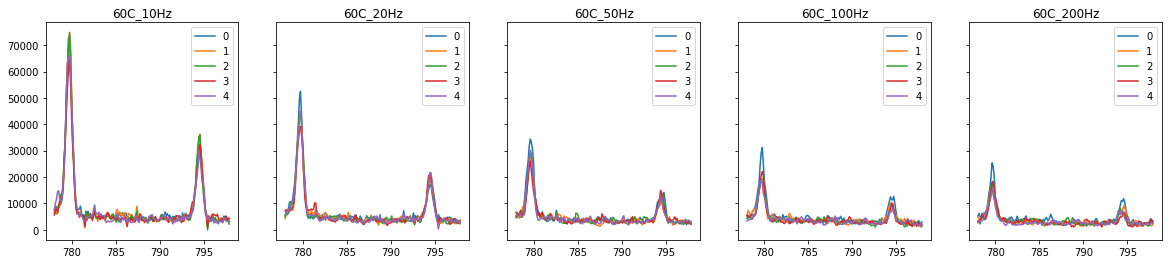

In [5]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

i=0
for filename in dfs_PL_cut:   
    ax[i].plot(dfs_PL_cut[filename].index,dfs_PL_cut[filename])
    ax[i].set_title(filename)
    ax[i].legend(dfs_PL_cut[filename].columns)
    i=i+1

Text(0.5,0,'frame #')

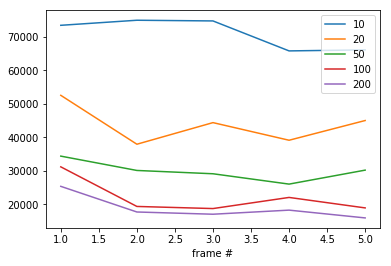

In [5]:
for maxarray in maximums:
    plt.plot([1,2,3,4,5],maxarray)
plt.legend(reprates)
plt.xlabel('frame #')

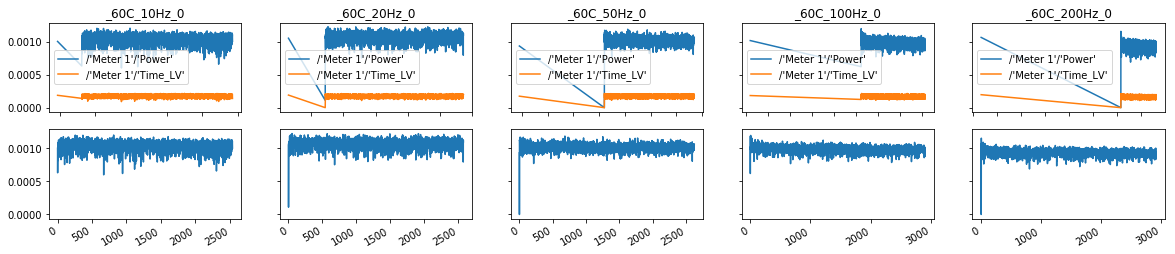

In [11]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

i=0
for filename in dfs_pow:
    meter1 = dfs_pow[filename]['/\'Meter 1\'/\'Power\'']
    meter2 = dfs_pow[filename]['/\'Meter 2\'/\'Power\'']
    ratio = meter1/meter2
    ax[i].plot(dfs_pow[filename]['/\'Meter 1\'/\'Time_LV\''],meter1)
    ax[i].plot(dfs_pow[filename]['/\'Meter 2\'/\'Time_LV\''],meter2)
    ax[i].set_title(filename)
    ax[i].legend(dfs_pow[filename].columns)
    ax[i].plot(meter1)
    i=i+1
    
fig.autofmt_xdate()

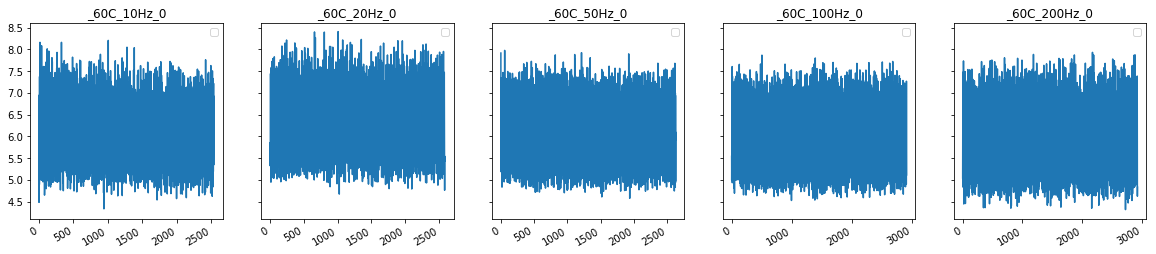

In [13]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

i=0
for filename in dfs_pow:
    meter1 = dfs_pow[filename]['/\'Meter 1\'/\'Power\'']
    meter2 = dfs_pow[filename]['/\'Meter 2\'/\'Power\'']
    ratio = meter1/meter2
    ax[i].set_title(filename)
    ax[i].legend(dfs_pow[filename].columns)
    ax[i].plot(ratio)
    i=i+1
    
fig.autofmt_xdate()

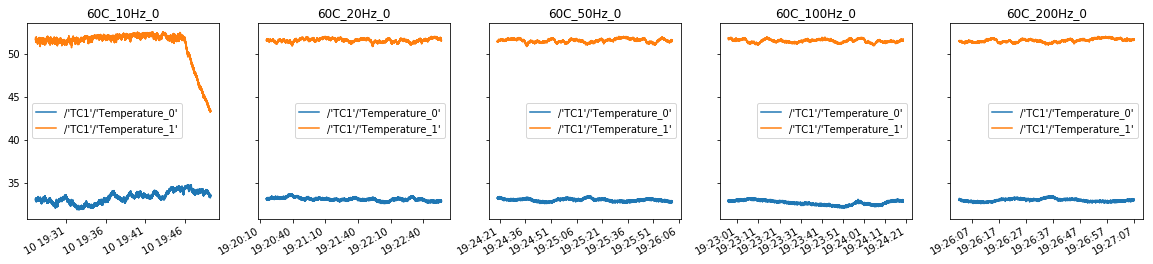

In [7]:
fig, ax = plt.subplots(1,5,sharey = True, figsize = (20,4))

i=0
for filename in dfs_T:   
    ax[i].plot(dfs_T[filename].index,dfs_T[filename]['/\'TC1\'/\'Temperature_1\''])
    ax[i].plot(dfs_T[filename].index,dfs_T[filename]['/\'TC1\'/\'Temperature_2\''])
    ax[i].set_title(filename)
    ax[i].legend(dfs_T[filename].columns)
    i=i+1
fig.autofmt_xdate()

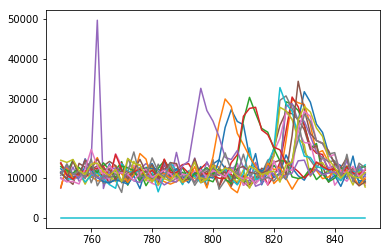

In [36]:
df_lt_gd = df_lt.filter(regex = '^(/\'Gate Delays\'*)')
gatedelays = df_lt_gd[df_lt_gd.columns[0]]

df_lt_max = df_lt.filter(regex = '^(/\'MaxIntensities\'*)')

fig, ax = plt.subplots(1,1)
for column in df_lt_max:
    ax.plot(gatedelays,df_lt_max[column])

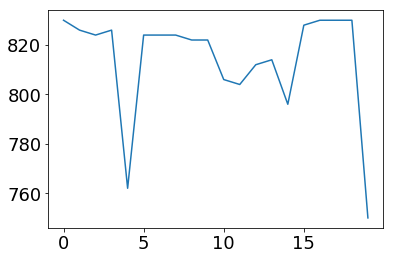

In [50]:
maxtimes = []
for column in df_lt_max:
    maxtimes.append(gatedelays[df_lt_max[column].idxmax()])

plt.plot(maxtimes)

In [52]:
times = []
filenames = []
for event in eventlog:
    if(event['event']['type'] == 'TestCaseInfoChange'):
        times.append(datetime.datetime.fromtimestamp(event['dt']))
        filenames.append(event['event']['event info']['filename'])
        
timearray = pd.Series(filenames, index = times)
timearray

2018-10-10 11:32:56.309022                   60C_10Hz
2018-10-10 11:34:42.682658                   60C_10Hz
2018-10-10 11:38:22.582646                   60C_20Hz
2018-10-10 12:04:46.251155                   60C_20Hz
2018-10-10 12:09:13.426155                   60C_20Hz
2018-10-10 12:15:03.505956              60C_20Hz_pos2
2018-10-10 12:18:00.274631    60C_20Hz_pos2_fixfilter
2018-10-10 12:18:02.035807    60C_20Hz_pos2_fixfilter
2018-10-10 12:20:08.113413    60C_20Hz_pos2_fixfilter
2018-10-10 12:20:13.388941                   60C_20Hz
2018-10-10 12:20:15.653167                   60C_20Hz
2018-10-10 12:22:56.732273                  60C_100Hz
2018-10-10 12:24:19.510152                   60C_50Hz
2018-10-10 12:26:02.096152                  60C_200Hz
2018-10-10 12:27:06.886152                   60C_10Hz
dtype: object